In [499]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [512]:
dataset = pd.read_csv(r'cardio_train.csv',sep=';', index_col=0)
dataset['age']=dataset['age']/365
dataset['age']=dataset['age'].round()

In [513]:
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1


In [514]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [515]:
x

array([[ 50.,   2., 168., ...,   0.,   0.,   1.],
       [ 55.,   1., 156., ...,   0.,   0.,   1.],
       [ 52.,   1., 165., ...,   0.,   0.,   0.],
       ...,
       [ 52.,   2., 183., ...,   0.,   1.,   0.],
       [ 61.,   1., 163., ...,   0.,   0.,   0.],
       [ 56.,   1., 170., ...,   0.,   0.,   1.]])

In [516]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [517]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.8, random_state=0)
#從skLearn函式庫中的Linear_model模組匯入LinearRegressio類
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()#創建一個名為regressor的物件
regressor.fit(x_train,y_train)#訓練線性歸模型


LinearRegression()

In [518]:
x_train

array([[ 59.,   2., 182., ...,   0.,   0.,   1.],
       [ 56.,   2., 165., ...,   1.,   0.,   1.],
       [ 48.,   1., 171., ...,   0.,   0.,   1.],
       ...,
       [ 61.,   2., 174., ...,   0.,   0.,   1.],
       [ 50.,   1., 153., ...,   0.,   0.,   1.],
       [ 56.,   2., 169., ...,   0.,   0.,   1.]])

In [519]:
y_pred = regressor.predict(x_test)
print(y_pred)
print(y_pred.shape)#y_pred 為一維向量

[0.2  0.34 0.44 ... 0.35 0.64 0.67]
(56000,)


In [520]:
np.set_printoptions(precision=2)#顯示兩位小數
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#將y_pred與y_test分別轉為len(y_pred),1)的2維陣列後合併

[[0.2  0.  ]
 [0.34 0.  ]
 [0.44 0.  ]
 ...
 [0.35 1.  ]
 [0.64 1.  ]
 [0.67 0.  ]]


In [521]:
# 反向淘汰時使用(增加常數1以符合y=b0(常數)+b1*x1+b2*x2+b3*x3.......)
# x_train = np.append(arr = np.ones((len(x_train[:,1]),1)).astype(int), values = x_train, axis = 1)
# x_train

In [522]:
#輸出模型截距與係數
print(regressor.fit(x_train,y_train).intercept_)
print(regressor.fit(x_train,y_train).coef_)


-0.5436642843403525
[ 0.01  0.02 -0.    0.01  0.    0.    0.13 -0.02 -0.03 -0.05 -0.04]


In [528]:
#輸入參數進行預測
a=regressor.predict([[67.0,1,148,50.0,130,80,2,2,0,1,1]])
print(a)

[0.61]


In [181]:
import statsmodels.api as sm
x_opt=np.array(x_train[:,[0,1,2,3,4,5,6,7,8,10]], dtype=float)
regressor_OLS=sm.OLS(endog=y_train, exog= x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:31:36   Log-Likelihood:                -9300.4
No. Observations:               14000   AIC:                         1.862e+04
Df Residuals:                   13990   BIC:                         1.870e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5745      0.095     -6.039      0.000      -0.761      -0.388
x1             0.0147      0.001     24.485      0.000       0.014       0.016
x2             0.0180      0.010      1.853      0.064      -0.001       0.037
x3            -0.0018      0.001     -3.158      0.002      -0.003      -0.001
x4             0.0051      0.000     17.070      0.000       0.004       0.006
x5             0.0002    2.9e-05      6.086      0.000       0.000       0.000
x6             0.0002   2.16e-05      7.281      0.000       0.000       0.000
x7             0.1300      0.007     19.584      0.000       0.117       0.143
x8            -0.0193      0.008     -2.513      0.012      -0.034      -0.004
x9            -0.0591      0.018     -3.338      0.001      -0.094      -0.024
==============================================================================
Omnibus:                    79317.620   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1362.639
Skew:                           0.013   Prob(JB):                    1.28e-296
Kurtosis:                       1.472   Cond. No.                     6.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
dataset.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [150]:
dataset=dataset[['cardio','age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active']]

In [160]:
dataset.corr().round(2)

,cardio,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,1.00,0.24,0.01,-0.01,0.18,0.05,0.07,0.22,0.09,-0.02,-0.01,-0.04
age,0.24,1.00,-0.02,-0.08,0.05,0.02,0.02,0.15,0.10,-0.05,-0.03,-0.01
gender,0.01,-0.02,1.00,0.50,0.16,0.01,0.02,-0.04,-0.02,0.34,0.17,0.01
height,-0.01,-0.08,0.50,1.00,0.29,0.01,0.01,-0.05,-0.02,0.19,0.09,-0.01
weight,0.18,0.05,0.16,0.29,1.00,0.03,0.04,0.14,0.11,0.07,0.07,-0.02
ap_hi,0.05,0.02,0.01,0.01,0.03,1.00,0.02,0.02,0.01,-0.00,0.00,-0.00
ap_lo,0.07,0.02,0.02,0.01,0.04,0.02,1.00,0.02,0.01,0.01,0.01,0.00
cholesterol,0.22,0.15,-0.04,-0.05,0.14,0.02,0.02,1.00,0.45,0.01,0.04,0.01
gluc,0.09,0.10,-0.02,-0.02,0.11,0.01,0.01,0.45,1.00,-0.00,0.01,-0.01
smoke,-0.02,-0.05,0.34,0.19,0.07,-0.00,0.01,0.01,-0.00,1.00,0.34,0.03


<AxesSubplot:>

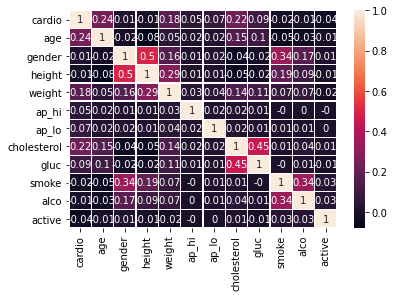

In [163]:
sns.heatmap(dataset.corr().round(2),annot=True,linewidths=0.2)

In [286]:
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,avg_ap
id,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,90.0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9,106.7
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5,90.0
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7,116.7
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,73.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.9,93.3
99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.5,106.7
99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.4,120.0
